<a href="https://colab.research.google.com/github/zanuarts/dicoding-BPML/blob/master/dicoding_17_LastSubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malaria Cell Detection

In [1]:
import os
os.environ['KAGGLE_USERNAME']= 'nurimammasri'
os.environ['KAGGLE_KEY'] = 'c1155f6163293daec115b33a4ba22c8b'

## Download and unzip the Dataset

In [2]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 665M/675M [00:06<00:00, 88.7MB/s]
100% 675M/675M [00:06<00:00, 110MB/s] 


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

print(tf.__version__)

2.4.1


In [4]:
import zipfile

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Split Dataset

In [5]:
mypath = '/content/cell_images'

In [31]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['C136P97ThinF_IMG_20151005_144727_cell_109.png', 'C70P31_ThinF_IMG_20150819_141403_cell_93.png', 'C184P145ThinF_IMG_20151203_104440_cell_13.png', 'C45P6ThinF_IMG_20151130_160135_cell_219.png', 'C189P150ThinF_IMG_20151203_141004_cell_75.png', 'C46P7ThinF_IMG_20151130_210815_cell_4.png', 'C82P43ThinF_IMG_20150817_124010_cell_186.png', 'C68P29N_ThinF_IMG_20150819_134830_cell_77.png', 'C39P4thinF_original_IMG_20150622_114609_cell_22.png', 'C107P68ThinF_IMG_20150924_221909_cell_161.png', 'C72P33_ThinF_IMG_20150815_104307_cell_223.png', 'C129P90ThinF_IMG_20151004_133421_cell_111.png', 'C96P57ThinF_IMG_20150824_112442_cell_195.png', 'C136P97ThinF_IMG_20151005_141321_cell_99.png', 'C132P93ThinF_IMG_20151004_151701_cell_173.png', 'C182P143NThinF_IMG_20151201_172759_cell_51.png', 'C68P29N_ThinF_IMG_20150819_134625_cell_7.png', 'C176P137NThinF_IMG_20151201_120845_cell_124.png', 'C130P91ThinF_IMG_20151004_141825_cell_135.png', 'C182P143NThinF_IMG_20151201_172524_cell_203.png', 'C62P23N_ThinF_IMG_

KeyboardInterrupt: ignored

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Parasitized    27560
Uninfected     27560
dtype: int64

In [9]:
df

,path,file_name,tag
0,/content/cell_images/Parasitized/C136P97ThinF_...,C136P97ThinF_IMG_20151005_144727_cell_109.png,Parasitized
1,/content/cell_images/Parasitized/C70P31_ThinF_...,C70P31_ThinF_IMG_20150819_141403_cell_93.png,Parasitized
2,/content/cell_images/Parasitized/C184P145ThinF...,C184P145ThinF_IMG_20151203_104440_cell_13.png,Parasitized
3,/content/cell_images/Parasitized/C45P6ThinF_IM...,C45P6ThinF_IMG_20151130_160135_cell_219.png,Parasitized
4,/content/cell_images/Parasitized/C189P150ThinF...,C189P150ThinF_IMG_20151203_141004_cell_75.png,Parasitized
...,...,...,...
55115,/content/cell_images/cell_images/Uninfected/C1...,C141P102ThinF_IMG_20151005_215348_cell_83.png,Uninfected
55116,/content/cell_images/cell_images/Uninfected/C1...,C101P62ThinF_IMG_20150918_151507_cell_27.png,Uninfected
55117,/content/cell_images/cell_images/Uninfected/C7...,C76P37ThinF_IMG_20150815_165356_cell_168.png,Uninfected
55118,/content/cell_images/cell_images/Uninfected/C1...,C129P90ThinF_IMG_20151004_133421_cell_54.png,Uninfected


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X= df['path']
y= df['tag']

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [13]:
df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation-set'})

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train-set'})

In [14]:
print('train size', len(df_tr))
print('val size', len(df_val))

train size 44096
val size 11024


In [15]:
df_all = df_tr.append([df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

df_all.sample(4)


set             tag        
train-set       Parasitized    22056
                Uninfected     22040
validation-set  Parasitized     5504
                Uninfected      5520
dtype: int64 




,path,tag,set
31851,/content/cell_images/Uninfected/C141P102ThinF_...,Uninfected,train-set
2751,/content/cell_images/Parasitized/C97P58ThinF_I...,Parasitized,train-set
22746,/content/cell_images/Uninfected/C129P90ThinF_I...,Uninfected,train-set
40041,/content/cell_images/Parasitized/C39P4thinF_or...,Parasitized,train-set


## Move the dataset

In [16]:
# !rm -rf /tmp/dataset/

In [17]:
import shutil
from tqdm.notebook import tqdm as tq

In [18]:
datasource_path = "/content/cell_images/"
dataset_path = "/content/dataset"

In [19]:
for index, row in tq(df_all.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))

    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

## Image Augmentation

In [20]:
base_dir = '/content/dataset/'
train_dir = os.path.join(base_dir,'train-set')
validation_dir = os.path.join(base_dir,'validation-set')

In [21]:
os.listdir(train_dir)

['Parasitized', 'Uninfected']

In [22]:
os.listdir(validation_dir)

['Parasitized', 'Uninfected']

In [23]:
train_uninfected_dir = os.path.join(train_dir, 'Uninfected')
train_parasitized_dir = os.path.join(train_dir, 'Parasitized')
validation_uninfected_dir = os.path.join(validation_dir, 'Uninfected')
validation_parasitized_dir = os.path.join(validation_dir, 'Parasitized')

In [24]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 26431 images belonging to 2 classes.
Found 9896 images belonging to 2 classes.


## Build Model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi mencapai 92%, train data diberhentikan !")
      self.model.stop_training = True

callbacks = myCallback()

In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 3,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
20/20 [==============================] - 34s 2s/step - loss: 0.7070 - accuracy: 0.5252 - val_loss: 0.6859 - val_accuracy: 0.6458
Epoch 2/25
20/20 [==============================] - 32s 2s/step - loss: 0.6933 - accuracy: 0.4891 - val_loss: 0.6686 - val_accuracy: 0.6146
Epoch 3/25
20/20 [==============================] - 32s 2s/step - loss: 0.6859 - accuracy: 0.5524 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 4/25
20/20 [==============================] - 31s 2s/step - loss: 0.6954 - accuracy: 0.4948 - val_loss: 0.6847 - val_accuracy: 0.5521
Epoch 5/25
20/20 [==============================] - 32s 2s/step - loss: 0.6797 - accuracy: 0.5979 - val_loss: 0.6588 - val_accuracy: 0.5625
Epoch 6/25
20/20 [==============================] - 32s 2s/step - loss: 0.7027 - accuracy: 0.5680 - val_loss: 0.6914 - val_accuracy: 0.5521
Epoch 7/25
20/20 [==============================] - 31s 2s/step - loss: 0.6962 - accuracy: 0.4596 - val_loss: 0.6944 - val_accuracy: 0.4688
Epoch 8/25
20/20 [==

## Plot loss and Accuracy

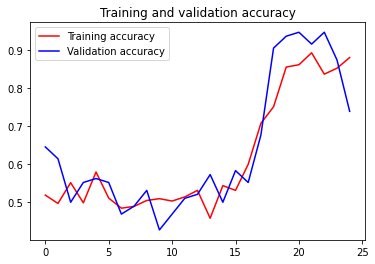

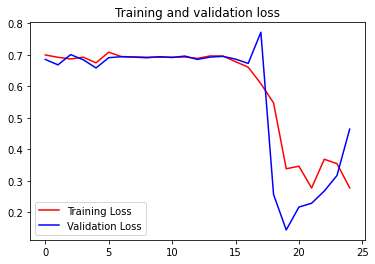

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model TF-Lite

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp04q_ax5j/assets


In [30]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
    f.write(tflite_model)